# Problem Description : 

Dear Participant,

Please find below the Project for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well. ( 5 points)
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments ( 3 points)
4. Split the data into training and test set in the ratio of 70:30 respectively (2 points)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)
6. Print the confusion matrix, classification report, and accuracy for all the above models (8 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (7 points)

Dataset:Bank_Personal_Loan_Modelling-1.csv

Column description: TheraBank_Column_Description.xlsx

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Supervised Learning_R4_Project_Thera Bank.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [2]:
DF = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
DF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Read the column description and ensure you understand each attribute well. ( 5 points)

In [3]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
DF.isnull().sum()  #There are no null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

ID                 => Customer ID. There is no relation between ID and target variable "Personal Loan", so we can drop this                           column.
Age	               => Customer's age in completed years. Age ranges from 23 to 67 years.
Experience	       => #years of professional experience. There are negative values in this column. We can delete these rows.
Income	           => Annual income of the customer ($000).
ZIPCode	           => Home Address ZIP code.
Family	           => Family size of the customer. Here Family size ranges from 1 to 4.
CCAvg	           => Avg. spending on credit cards per month ($000). This ranges from 0 to 10.
Education	       => Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage	       => Value of house mortgage if any. ($000). This ranges from 0 to 635K$.
Personal Loan	   => Did this customer accept the personal loan offered in the last campaign?. This is our target column and                         this is either 0 (No) or 1 (yes). 
Securities Account => Does the customer have a securities account with the bank?. This is either 0 (No) or 1 (yes).
CD Account	       => Does the customer have a certificate of deposit (CD) account with the bank?. This is either 0 (No) or 1                         (yes).
Online	           => Does the customer use internet banking facilities?. This is either 0 (No) or 1 (yes).
CreditCard	       => Does the customer use a credit card issued by UniversalBank?. This is either 0 (No) or 1 (yes).

# 2. Study the data distribution in each attribute, share your findings. (5 points)

In [5]:
DF.apply(lambda x: len(x.unique())) # All IDs are unique values

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
# Since ID has no relation with target column, we will drop this column
DF.drop('ID',axis=1,inplace=True)
DF.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


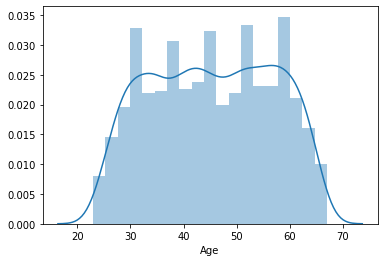

In [7]:
sns.distplot(DF['Age'])

In [8]:
# There are lot of people from Age 30 to 60 and Age is normally distributed.

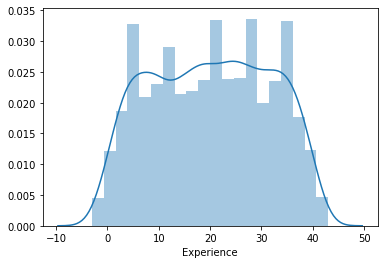

In [9]:
sns.distplot(DF['Experience'])

In [10]:
DF['Experience'][DF['Experience']<0].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [11]:
# There are total 52 records having experience less than 0 experience. These records needs to deleted.

In [12]:
DF.drop(DF[DF['Experience']<0].index,axis=0,inplace=True)

In [13]:
DF.shape

(4948, 13)

In [14]:
DF[DF['Experience'] < 0]['Experience'].count()

0

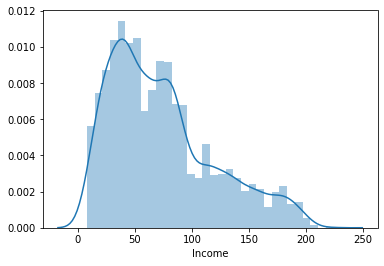

In [15]:
sns.distplot(DF['Income'])

In [16]:
# Income column is positively skewed with majority of customers having income from 35K$ to 90K$

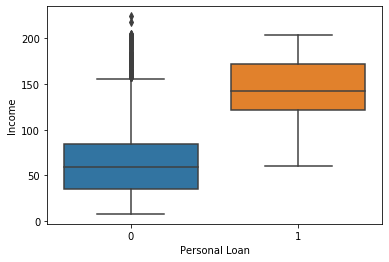

In [17]:
sns.boxplot(DF['Personal Loan'], DF['Income'])

In [18]:
# People who have taken loan have higher income than people who have not taken loan

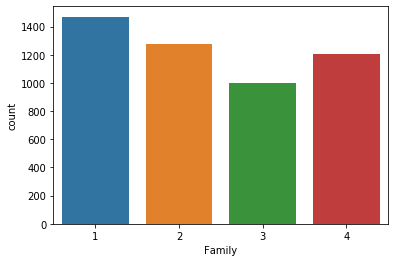

In [19]:
sns.countplot('Family',data=DF)

In [20]:
# Family count is evenly distributed

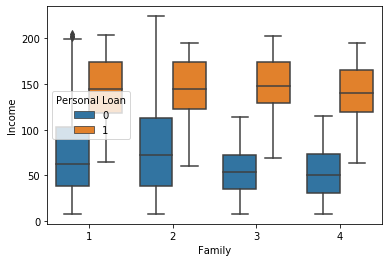

In [21]:
sns.boxplot(DF['Family'],DF['Income'],hue=DF['Personal Loan'])

In [22]:
# Families with income more than 100K$ have taken personal loan 

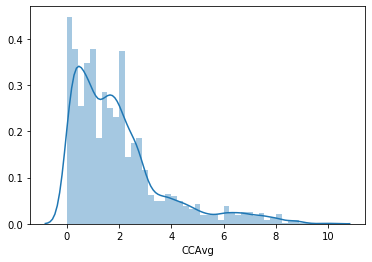

In [23]:
sns.distplot(DF['CCAvg']);

In [24]:
# CCAvg is positively skewed distribution and majority people spends less than 3K$ per month on credit card

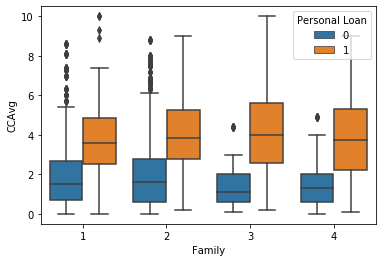

In [25]:
sns.boxplot(DF['Family'],DF['CCAvg'],hue=DF['Personal Loan'])

In [26]:
# From above plot, people who have taken personal loan are people who spend more on credit card per month than who have not taken personal loan
# Family of 1 and 2 spend more on credit card than 3 and 4 
# People who are spending more can be our target customers for personal loan 

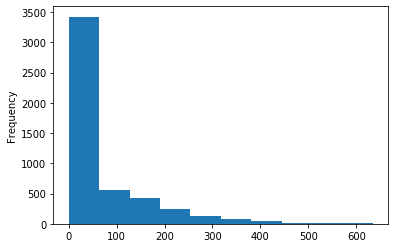

In [27]:
DF['Mortgage'].plot.hist()

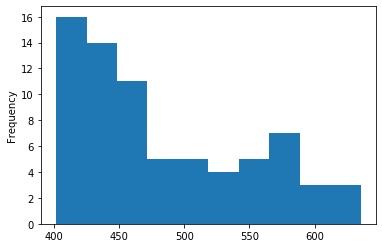

In [28]:
# Lot of people have mortgage less than 400K and 635K$ is max value of mortgage
DF[DF['Mortgage'] > 400]['Mortgage'].plot.hist()

In [29]:
# People having more 400K$ mortgage can also be good target customers for bank

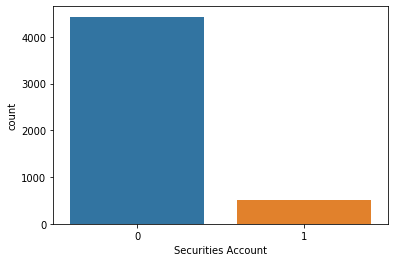

In [30]:
sns.countplot(x='Securities Account',data=DF)

In [31]:
# There are lot of people who dont have Security account with the bank 

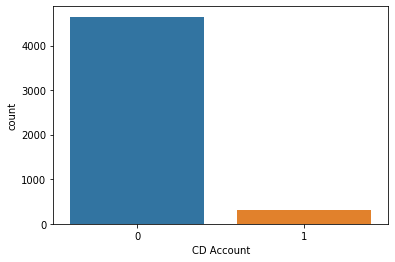

In [32]:
sns.countplot(x='CD Account',data=DF)

In [33]:
# There are lot of people who dont have CD account with the bank 

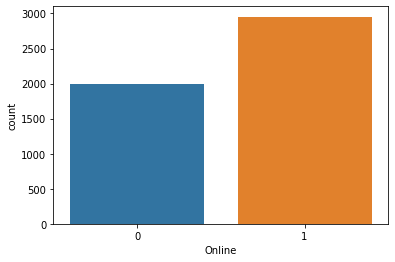

In [34]:
sns.countplot(x='Online',data=DF)

In [35]:
# Majority of people are having internet banking facility

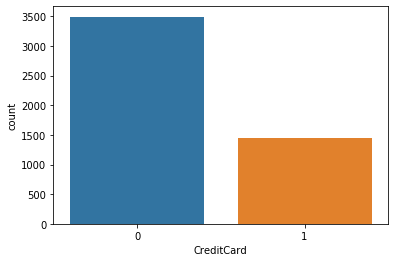

In [36]:
sns.countplot(x='CreditCard',data=DF)

In [37]:
# Majority of people dont use credit card issued by Universal Bank

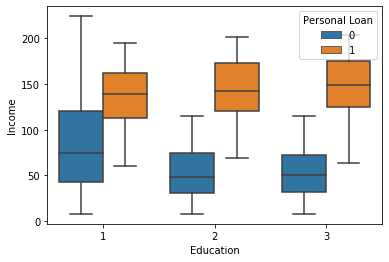

In [38]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=DF)

In [39]:
# People with undergrad education(1) have higher income than 2, 3 categories, but people who have taken loan have same income level

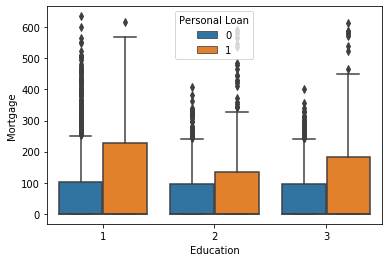

In [40]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=DF)

In [41]:
# Lot of people who have taken loan have high Mortgage than who have not taken loan 

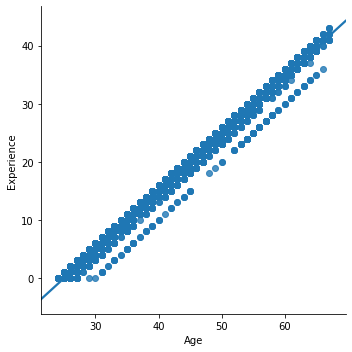

In [42]:
sns.lmplot(x="Age", y="Experience", data=DF)

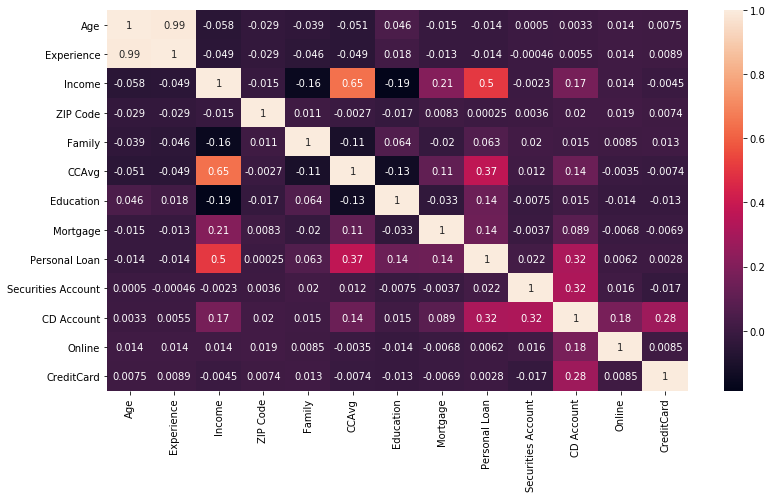

In [43]:
plot.figure(figsize=(13,7))
sns.heatmap(DF.corr(),annot=True)

In [44]:
# Age and Experience are highly correlated and we drop experience column

In [45]:
DF.drop('Experience',axis=1,inplace=True)

In [46]:
DF.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# Get the target column distribution. Your comments ( 3 points)

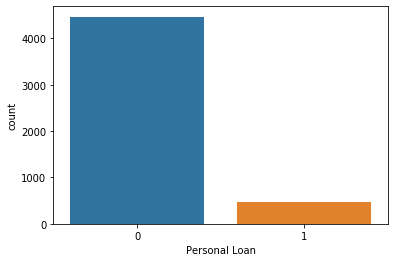

In [47]:
sns.countplot('Personal Loan',data=DF)

In [48]:
# There are very less people who have taken loan and this means imbalance dataset where people who have not taken loan is more 

# Split the data into training and test set in the ratio of 70:30 respectively (2 points)

In [49]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(DF, test_size = 0.3,random_state=5)

In [50]:
X_train = train.drop('Personal Loan',axis=1)   
X_test  = test.drop('Personal Loan',axis=1)   
Y_train = train['Personal Loan']
Y_test  = test['Personal Loan']

In [51]:
X_train.shape,X_test.shape

((3463, 11), (1485, 11))

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
Xs_train = pd.DataFrame(sc.transform(X_train))
Xs_test = pd.DataFrame(sc.transform(X_test))

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

Naive Bayes

In [53]:
from sklearn.metrics import accuracy_score
naive_model = GaussianNB()
naive_model.fit(Xs_train, Y_train)

train_prediction = naive_model.predict(Xs_train)
test_prediction = naive_model.predict(Xs_test)
print('Training accuracy = ', accuracy_score(Y_train, train_prediction)) 
print('Testing accuracy = ', accuracy_score(Y_test, test_prediction))

Training accuracy =  0.879872942535374
Testing accuracy =  0.9050505050505051


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, test_prediction)
print(confusion_matrix)

[[1261   92]
 [  49   83]]


Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xs_train, Y_train)
test_prediction=model.predict(Xs_test)
train_prediction=model.predict(Xs_train)
print('Training accuracy = ', accuracy_score(Y_train, train_prediction)) 
print('Testing accuracy = ', accuracy_score(Y_test, test_prediction))

Training accuracy =  0.9471556453941669
Testing accuracy =  0.9622895622895623


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, test_prediction)
print(confusion_matrix)

[[1332   21]
 [  35   97]]


KNN Algorithm

In [57]:
ac_scores = []
   
for K in range(20):
    K=K+1
    Model = KNeighborsClassifier(n_neighbors=K)
    Model.fit(Xs_train, Y_train)
    Y_pred = Model.predict(Xs_test)
    score = accuracy_score(Y_test, Y_pred)
    ac_scores.append((score,K))

In [58]:
score_df=pd.DataFrame(ac_scores)
score_df

,0,1
0,0.962290,1
1,0.958249,2
2,0.964983,3
3,0.958923,4
4,0.959596,5
5,0.956902,6
6,0.961616,7
7,0.956229,8
8,0.957576,9
9,0.956902,10


In [59]:
Model = KNeighborsClassifier(metric= 'euclidean',n_neighbors=3)
Model.fit(Xs_train, Y_train)
test_pred = Model.predict(Xs_test)
train_pred = Model.predict(Xs_train)
score_test = accuracy_score(Y_test, test_pred)
score_train = accuracy_score(Y_train, train_pred)
score_train,score_test

(0.9728559052844354, 0.9649831649831649)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, test_prediction)
print(confusion_matrix)

[[1332   21]
 [  35   97]]


# Give your reasoning on which is the best model in this case and why it performs better? (7 points)

KNN: 0.952641 (0.016798)


C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.945417 (0.015000)
NB: 0.878716 (0.016592)


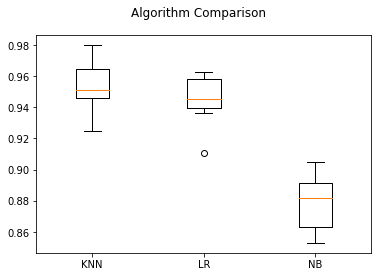

In [66]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    cv_results = model_selection.cross_val_score(model, Xs_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.boxplot(results)
ax.set_xticklabels(names)
plot.show()

In [ ]:
# From above boxplot, KNN has high accuracy as compared to other 2 but Logistic regression has slighly less variance. 